## Nivell 1

### *Exercici 2*

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [13]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import pandas as pd


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Enric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Enric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
#Tret d'un review d'un hotel a la web de Booking
text = """Staff was somehow very unfriendly and every time we came home the staff guy came out of his room and 
sat at the reception, watching us and checking what exactly we were doing; as we were using the bathroom, 
dressed in pijamas, it felt somehow very uncomfortable to be watched by some guy (we are 2 females)"""

In [22]:
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Staff was somehow very unfriendly and every time we came home the staff guy came out of his room and \nsat at the reception, watching us and checking what exactly we were doing; as we were using the bathroom, \ndressed in pijamas, it felt somehow very uncomfortable to be watched by some guy (we are 2 females)']


In [23]:
tokenized_word = word_tokenize(text)
print(tokenized_word)

['Staff', 'was', 'somehow', 'very', 'unfriendly', 'and', 'every', 'time', 'we', 'came', 'home', 'the', 'staff', 'guy', 'came', 'out', 'of', 'his', 'room', 'and', 'sat', 'at', 'the', 'reception', ',', 'watching', 'us', 'and', 'checking', 'what', 'exactly', 'we', 'were', 'doing', ';', 'as', 'we', 'were', 'using', 'the', 'bathroom', ',', 'dressed', 'in', 'pijamas', ',', 'it', 'felt', 'somehow', 'very', 'uncomfortable', 'to', 'be', 'watched', 'by', 'some', 'guy', '(', 'we', 'are', '2', 'females', ')']


In [24]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 49 samples and 63 outcomes>


In [25]:
fdist.most_common(5)

[('we', 4), ('and', 3), ('the', 3), (',', 3), ('somehow', 2)]

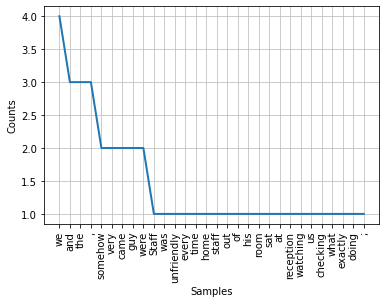

In [26]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

## Nivell 2

#### *Exercici 1*
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [27]:
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
print("Tokenized word:",tokenized_word)
print("Filterd word:",filtered_word)

Tokenized word: ['Staff', 'was', 'somehow', 'very', 'unfriendly', 'and', 'every', 'time', 'we', 'came', 'home', 'the', 'staff', 'guy', 'came', 'out', 'of', 'his', 'room', 'and', 'sat', 'at', 'the', 'reception', ',', 'watching', 'us', 'and', 'checking', 'what', 'exactly', 'we', 'were', 'doing', ';', 'as', 'we', 'were', 'using', 'the', 'bathroom', ',', 'dressed', 'in', 'pijamas', ',', 'it', 'felt', 'somehow', 'very', 'uncomfortable', 'to', 'be', 'watched', 'by', 'some', 'guy', '(', 'we', 'are', '2', 'females', ')']
Filterd word: ['Staff', 'somehow', 'unfriendly', 'every', 'time', 'came', 'home', 'staff', 'guy', 'came', 'room', 'sat', 'reception', ',', 'watching', 'us', 'checking', 'exactly', ';', 'using', 'bathroom', ',', 'dressed', 'pijamas', ',', 'felt', 'somehow', 'uncomfortable', 'watched', 'guy', '(', '2', 'females', ')']


In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_word)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Staff', 'somehow', 'unfriendly', 'every', 'time', 'came', 'home', 'staff', 'guy', 'came', 'room', 'sat', 'reception', ',', 'watching', 'us', 'checking', 'exactly', ';', 'using', 'bathroom', ',', 'dressed', 'pijamas', ',', 'felt', 'somehow', 'uncomfortable', 'watched', 'guy', '(', '2', 'females', ')']
Stemmed Sentence: ['staff', 'somehow', 'unfriendli', 'everi', 'time', 'came', 'home', 'staff', 'guy', 'came', 'room', 'sat', 'recept', ',', 'watch', 'us', 'check', 'exactli', ';', 'use', 'bathroom', ',', 'dress', 'pijama', ',', 'felt', 'somehow', 'uncomfort', 'watch', 'guy', '(', '2', 'femal', ')']


## Nivell 3

### *Exercici 1*

Realitza sentiment analysis al teu conjunt de dades.

+ __*SELECCIONO UN COMENTARI D'USUARI D'UN HOTEL AL WEB DE BOOKING__*

In [32]:
text2 = """The location was outstanding - overlooking Piccadilly and close to shops and transport.
It doesn't get better! The room was spacious for central London and very comfortable."""

In [33]:
from textblob import TextBlob

In [35]:
blob = TextBlob(text2)
blob.sentiment

Sentiment(polarity=0.41125, subjectivity=0.65625)

+ *La propietat  "sentiment" retorna una tuple amb 2 valors :

   + a) *polarity té un rang de -1 a 1 (-1 = molt negatiu, 0 = neutral, 1 = molt positiu)*
   
   + b) *subjectivity té un rang de 0 a 1 (0 = molt objectiu, 1 = molt subjectiu)
   
   

+ *També podem fer l'anàlisi per cada frase que composa el text*

In [36]:
blob.sentences

[Sentence("The location was outstanding - overlooking Piccadilly and close to shops and transport."),
 Sentence("It doesn't get better!"),
 Sentence("The room was spacious for central London and very comfortable.")]

In [38]:
for sentence in blob.sentences:

print(sentence.sentiment)

Sentiment(polarity=0.5, subjectivity=0.875)
Sentiment(polarity=0.625, subjectivity=0.5)
Sentiment(polarity=0.26, subjectivity=0.625)
